# <font color = '545AA7'> Signal Averaging </font>

The following is a demonstration signal averaging as a means of increasin the signal-to-noise ratio in instrumental data. The general idea is that any real signal should always be pointing the same direction during each spectrum while noise is random both in magnitude and direction and should average to zero for infinitely large numbers of spectra. By adding multiple spectra together, the signal should, on average, reinforce each other while random noise should, on average, progressively cancel out.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

%matplotlib inline

First, let's create synthetic, noisey data by generating an array of zeros which is the baseline. Four points in this array are then assigned to values greater than zero to represent signal of peaks in a spectrum. Finally, four noisy spectra are created by adding random noise the a spectrum just created.

In [2]:
signal = np.zeros(1000)

# Adding in non-zero values as signals

signal[50] = 1.3
signal[151] =  0.5
signal[832] = 0.43
signal[512] = 0.12

# Create four noisy spectra by adding random noise; a more efficient way is shown later

data1 = signal + 0.8 * np.random.rand(1000)
data2 = signal + 0.8 * np.random.rand(1000)
data3 = signal + 0.8 * np.random.rand(1000)
data4 = signal + 0.8 * np.random.rand(1000)

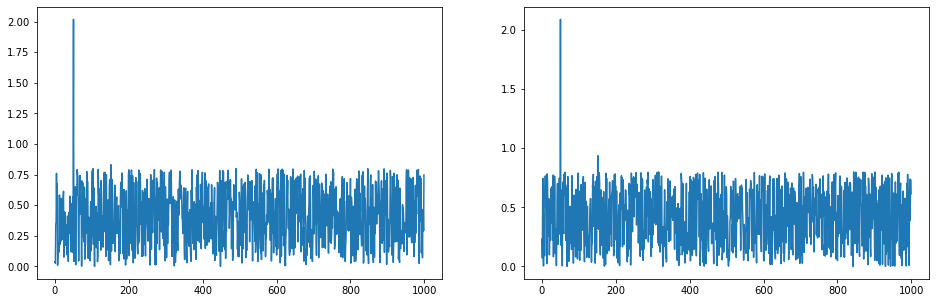

In [3]:
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(data1)
ax2.plot(data2)

Next, we will start adding together these noisy spectra. In the left plot below, two noisy spectr are folded to gether with only one peak clearly visible and another starting to emerge. When four noisy spectra are added together (right), a third peak is becoming visible. By adding more spectra together, the noise progressively cancels out leaving the signal.

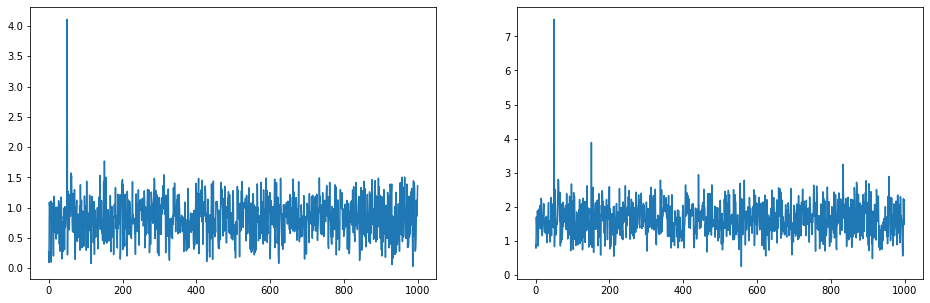

In [4]:
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(data1 + data2)
ax2.plot(data1 + data2 + data3 + data4)

Even after adding together four spectra, many of the signal peaks that we know should be there are not visible. We need more spectra. In data collection, this is called taking more scans of the sample.

Above, you will notice that we are doing the same thing of adding (signal + noise) to the data over and over again. Whenever you doing the same thing repeately, it is a good sign that there is an easier way of doing it. We can use a `for` loop to repeat this process for us.

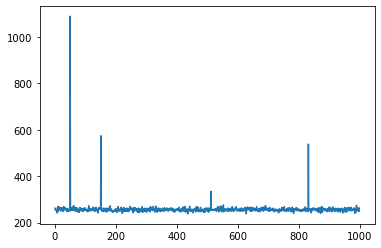

In [5]:
data = np.zeros(1000)

scans = 640

for scan in range(scans):
    data = data + (signal + 0.8 * np.random.rand(1000))
    
plt.plot(data)